In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
import os

In [4]:
df=pd.read_csv("train_v9rqX0R.csv")

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [7]:
pd.isnull(df).sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df["Outlet_Size"].mode()

0    Medium
dtype: object

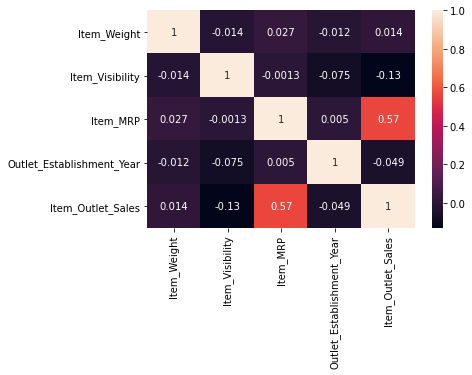

In [9]:
sns.heatmap(df.corr(),annot=True)

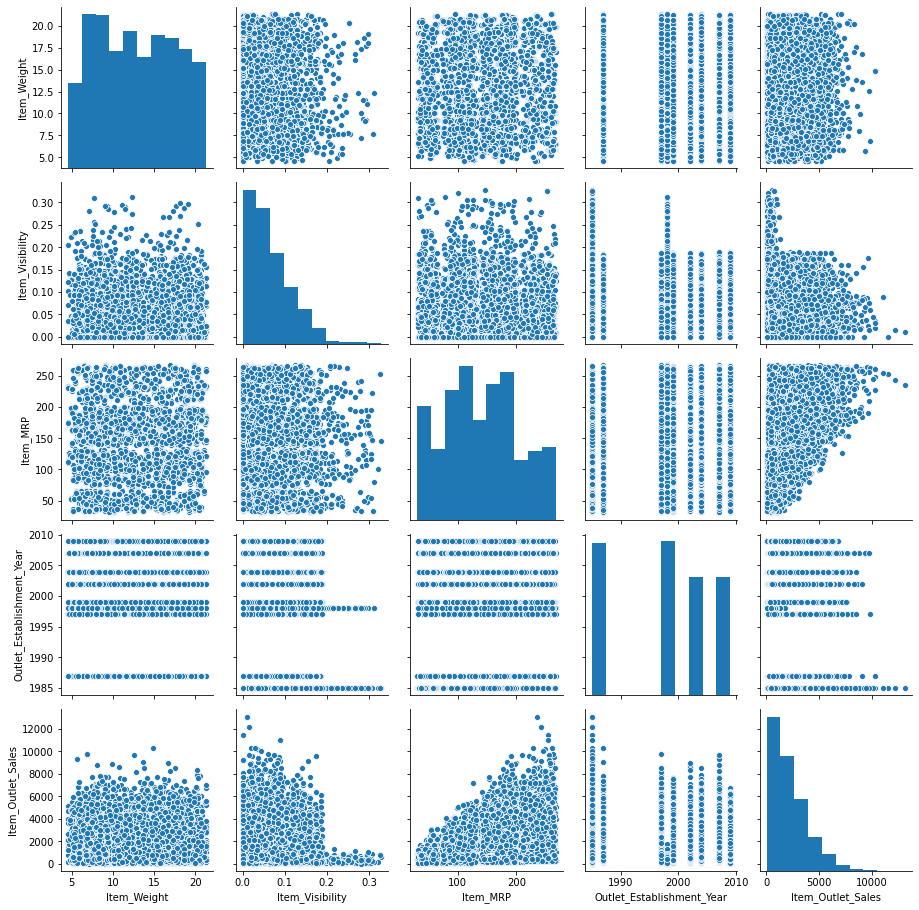

In [10]:
sns.pairplot(df)

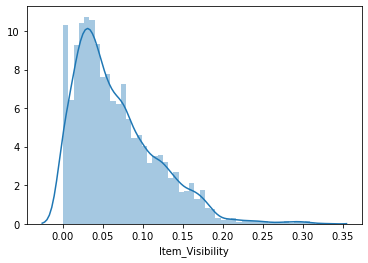

In [11]:
sns.distplot(df["Item_Visibility"])

In [12]:
df["Outlet_Size"]=df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

In [13]:
pd.isnull(df).sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df["Item_Weight"].value_counts().head()

12.15    86
17.60    82
13.65    77
11.80    76
15.10    68
Name: Item_Weight, dtype: int64

In [18]:
df["Item_Weight"].median()

12.6

In [20]:
df["Item_Weight"]=df["Item_Weight"].fillna(df["Item_Weight"].median())

In [21]:
pd.isnull(df).sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


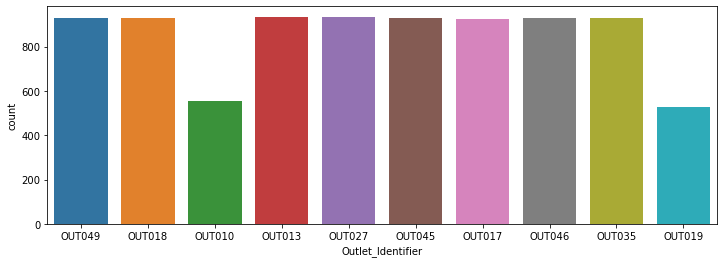

In [24]:
plt.figure(figsize=(12,4))
sns.countplot("Outlet_Identifier",data=df)

In [25]:
df["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [26]:
df["Outlet_Size"]=df["Outlet_Size"].map({"Small":0,"Medium":1,"High":2})

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052


In [28]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [29]:
df["Outlet_Location_Type"]=df["Outlet_Location_Type"].map({"Tier 1":1,"Tier 2":2,"Tier 3":3})

In [30]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [31]:
df["Outlet_Type"]=df["Outlet_Type"].map({"Supermarket Type1":0,"Supermarket Type2":1,"Supermarket Type3":2,"Grocery Store":3})

In [32]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [33]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].map({"Low Fat":0,"Regular":1,"low fat":0,"LF":0,"reg":1})

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,1,0,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,3,1,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,1,0,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,3,3,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,2,3,0,994.7052


In [35]:
df["Item_Visibility"]=df["Item_Visibility"].round(decimals=2)

In [94]:
visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')


miss_bool = (df['Item_Visibility'] == 0)

df.loc[miss_bool,'Item_Visibility'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.T[x])


In [95]:
df.head(6)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.020000,Dairy,249.8,OUT049,1999,1,1,0,3735.1380
1,DRC01,5.920,1,0.020000,Soft Drinks,48.3,OUT018,2009,1,3,1,443.4228
2,FDN15,17.500,0,0.020000,Meat,141.6,OUT049,1999,1,1,0,2097.2700
3,FDX07,19.200,1,0.013333,Fruits and Vegetables,182.1,OUT010,1998,1,3,3,732.3800
4,NCD19,8.930,0,0.006667,Household,53.9,OUT013,1987,2,3,0,994.7052
5,FDP36,10.395,1,0.060000,Baking Goods,51.4,OUT018,2009,1,3,1,556.6088


In [36]:
df["Item_MRP"]=df["Item_MRP"].round(decimals=1)
df["Item_MRP"].astype("int64")

0       249
1        48
2       141
3       182
4        53
       ... 
8518    214
8519    108
8520     85
8521    103
8522     75
Name: Item_MRP, Length: 8523, dtype: int64

In [89]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [96]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [99]:
df["Item_Type_Combined"]=df["Item_Type_Combined"].map({"Food":0,"Non-Consumable":1,"Drinks":2})

In [100]:
X=df[[ 'Item_Visibility',"Item_Type_Combined",
        'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Location_Type']]
y=df["Item_Outlet_Sales"]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [48]:
lm=LinearRegression()

In [102]:
lm.fit(X_train,y_train)

LinearRegression()

In [103]:
lm.coef_

array([-4793.50234655,   -52.83327975,    15.6537852 ,   -10.7942725 ,
         159.21116866])

In [51]:
import statsmodels.api as sm

In [104]:
X1=df[[ 'Item_Visibility',"Item_Type_Combined",
        'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Location_Type']]
y1=df["Item_Outlet_Sales"]
X2 = sm.add_constant(X1)
est = sm.OLS(y1, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     910.7
Date:                Wed, 01 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:37:47   Log-Likelihood:                -73698.
No. Observations:                8523   AIC:                         1.474e+05
Df Residuals:                    8517   BIC:                         1.474e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [105]:
pd.DataFrame(lm.coef_,X.columns,columns=["coefficient"])

,coefficient
Item_Visibility,-4793.502347
Item_Type_Combined,-52.833280
Item_MRP,15.653785
Outlet_Establishment_Year,-10.794272
Outlet_Location_Type,159.211169


In [107]:
predictions=lm.predict(X_test)

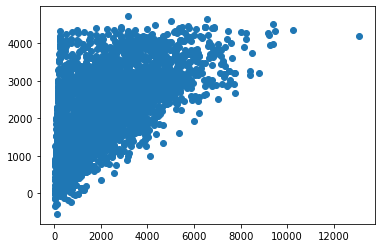

In [108]:

plt.scatter(y_test,predictions)

In [56]:
from sklearn import metrics

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 992.2144768825143
MSE: 1788496.5262645122
RMSE: 1337.3468234771833


In [58]:
test=pd.read_csv("test_AbJTz2l.csv")

In [59]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 332.9+ KB


In [61]:
pd.isnull(test).sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [62]:
test["Outlet_Size"].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [63]:
test["Outlet_Size"].mode()

0    Medium
dtype: object

In [64]:
test["Outlet_Size"]=test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0])

In [65]:
pd.isnull(test).sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [66]:
test["Item_Weight"].mean()

12.695633368756642

In [67]:
test['Item_Weight']=test["Item_Weight"].fillna(test["Item_Weight"].mean())

In [68]:
pd.isnull(test).sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

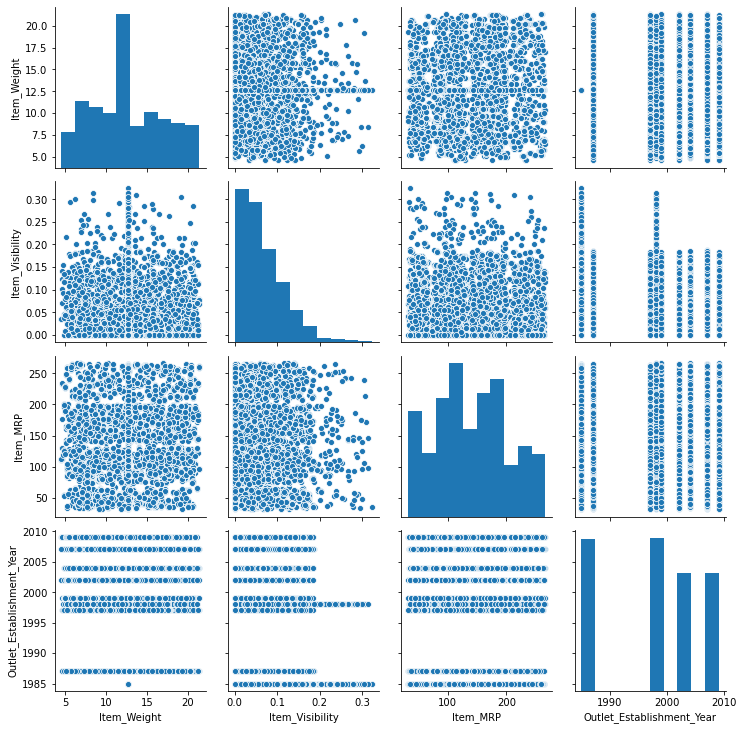

In [69]:
sns.pairplot(test)

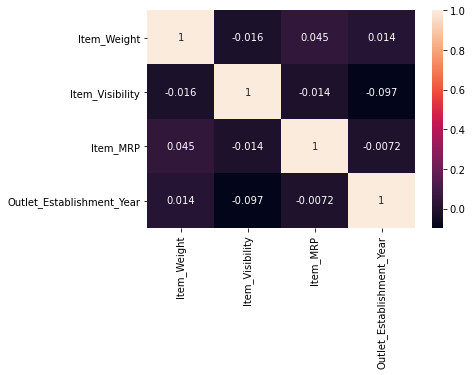

In [70]:
sns.heatmap(test.corr(),annot=True)

In [71]:
test["Outlet_Size"]=test["Outlet_Size"].map({"Small":0,"Medium":1,"High":2})

In [72]:
test["Item_Fat_Content"]=test["Item_Fat_Content"].map({"Low Fat":0,"Regular":1,"low fat":0,"LF":0,"reg":1})

In [73]:
test["Outlet_Location_Type"]=test["Outlet_Location_Type"].map({"Tier 1":1,"Tier 2":2,"Tier 3":3})

In [74]:
test["Outlet_Type"]=test["Outlet_Type"].map({"Supermarket Type1":0,"Supermarket Type2":1,"Supermarket Type3":2,"Grocery Store":3})

In [75]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,1,0
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,1,2,0
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,1,3,3
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,1,2,0
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,1,3,2


In [113]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_Combined'],
      dtype='object')

In [110]:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
test['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [119]:
visibility_avg = test.pivot_table(values='Item_Visibility', index='Item_Identifier')


miss_bool = (test['Item_Visibility'] == 0)

test.loc[miss_bool,'Item_Visibility'] = test.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.T[x])


In [121]:
test["Item_Type_Combined"]=test["Item_Type_Combined"].map({"Food":0,"Non-Consumable":1,"Drinks":2})

In [122]:
X_test1=test[[ 'Item_Type_Combined', 'Item_Visibility',
        'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Location_Type'
       ]]

In [123]:
y_pred=lm.predict(X_test1)

In [124]:
submission=pd.DataFrame({"Item_Identifier":test["Item_Identifier"],
                        
                        "Outlet_Identifier":test["Outlet_Identifier"],
                        "Item_Outlet_Sales":y_pred})

In [125]:
submission.to_csv("Big Mart Sales.csv",index=False)

In [126]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1830.790686
1,FDW14,OUT017,1580.450772
2,NCN55,OUT010,-542.445898
3,FDQ58,OUT017,2641.651555
4,FDY38,OUT027,4272.600920


In [127]:
submission[submission["Item_Outlet_Sales"]<0].count()

Item_Identifier      1605
Outlet_Identifier    1605
Item_Outlet_Sales    1605
dtype: int64

In [88]:
submission["Item_Outlet_Sales"].mode()[0]

744.4546203911905